<a href="https://colab.research.google.com/github/qinhuuuuu/MachineLearning/blob/main/GiuaKy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/machineLearning/CK'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/machineLearning/CK


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import metrics as m
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import naive_bayes
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode
from sklearn.metrics.cluster import completeness_score

In [ ]:
data = pd.read_csv('result.csv')
y = data['game_rating'].astype(str)
x = data.iloc[:,1:]
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3)

In [ ]:
def perform_cross_validation(model, X, y, n_folds, n_iterations):
    sum_accuracy=0
    sum_precision=0
    sum_recall=0
    sum_f1=0

    acc =0
    pre =0
    re=0
    f1 =0
    for i in range(n_iterations):
        scores = cross_validate(model, X, y, scoring='accuracy', cv=n_folds)
        sum_accuracy += np.mean(scores['test_score'])
        acc=scores['test_score']

        scores = cross_validate(model, X, y, scoring='precision_micro',cv=n_folds)
        sum_precision += np.mean(scores['test_score'])
        pre = scores['test_score']

        scores = cross_validate(model,X,y,scoring='recall_micro',cv=n_folds)
        sum_recall += np.mean(scores['test_score'])
        re = scores['test_score']

        scores = cross_validate(model,X,y,scoring='f1_micro',cv=n_folds)
        sum_f1 += np.mean(scores['test_score'])
        f1 = scores['test_score']
        
    print('accuracy: ', sum_accuracy/n_iterations)
    print('precision: ', sum_precision/n_iterations)
    print('recall: ', sum_recall/n_iterations)
    print('f1: ', sum_f1/n_iterations)
    plt.plot(range(len(acc)), acc, marker='o', label='Accuracy')
    plt.plot(range(len(pre)), pre, marker='o', label='Precision')
    plt.plot(range(len(re)), re, marker='o', label='Recall')
    plt.plot(range(len(f1)), f1, marker='o', label='F1')

    plt.xlabel('Fold')
    plt.ylabel('Value')
    plt.title('Cross-validation Metrics')
    plt.legend()
    plt.show()

In [ ]:
print(y_train.count())
print(y_train.value_counts())

670
4.0    236
3.5    206
4.5     98
3.0     86
2.5     38
2.0      6
Name: game_rating, dtype: int64


In [ ]:
adasyn = ADASYN(sampling_strategy={'2.0': 200, '2.5': 200, '3.0':250, '3.5':206, '4.0':236 , '4.5':250}, n_neighbors=5 )
x_train_new, y_train_new = adasyn.fit_resample(x_train, y_train)
print(y_train_new.value_counts())
print(y_train.value_counts())

4.5    265
3.0    237
4.0    236
3.5    206
2.0    198
2.5    197
Name: game_rating, dtype: int64
4.0    236
3.5    206
4.5     98
3.0     86
2.5     38
2.0      6
Name: game_rating, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (250) in class 3.0 will be larger than the number of samples in the majority class (class #4.0 -> 236)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (250) in class 4.5 will be larger than the number of samples in the majority class (class #4.0 -> 236)
  warnings.warn(


accuracy:  0.5314995563442769
precision:  0.5314995563442769
recall:  0.5314995563442769
f1:  0.5314995563442769


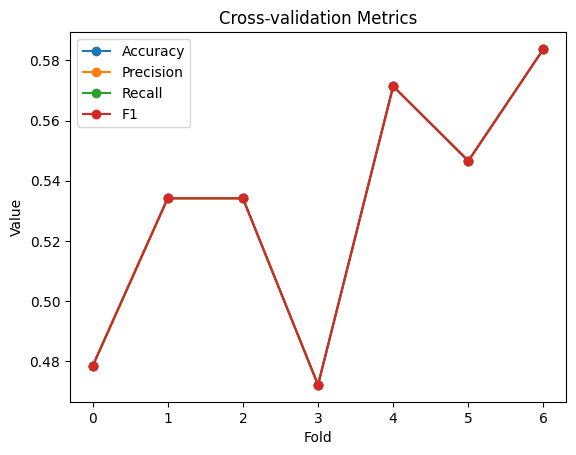

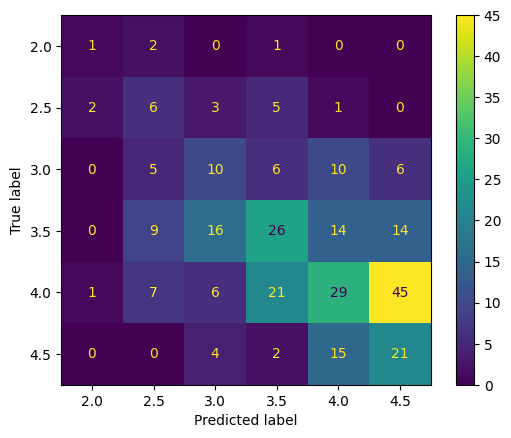

In [ ]:
# BernoulliNB
nb = naive_bayes.BernoulliNB()
nb.fit(x_train_new, y_train_new)
y_predict = nb.predict(x_test)
perform_cross_validation(model = nb, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

accuracy:  0.5235137533274179
precision:  0.5235137533274179
recall:  0.5235137533274179
f1:  0.5235137533274179


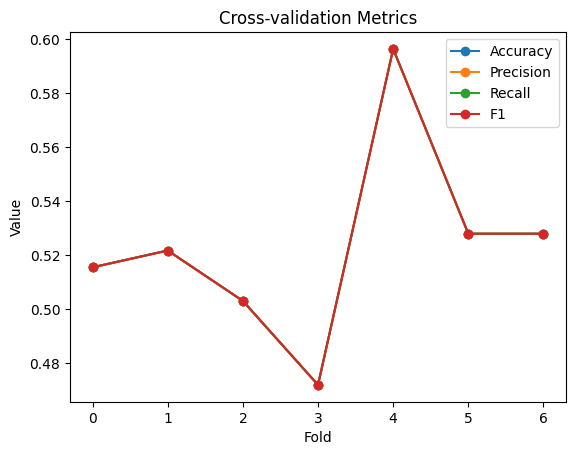

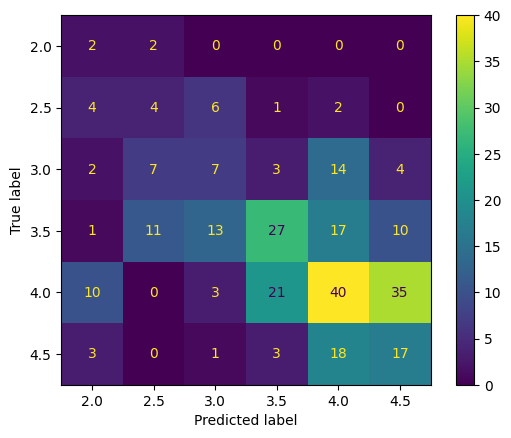

In [ ]:
# SVM
svm_li = svm.SVC(kernel='poly')
svm_li.fit(x_train_new, y_train_new)
y_predict = svm_li.predict(x_test)
perform_cross_validation(model = svm_li, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

accuracy:  0.6202307009760426
precision:  0.6202307009760426
recall:  0.6202307009760426
f1:  0.6202307009760426


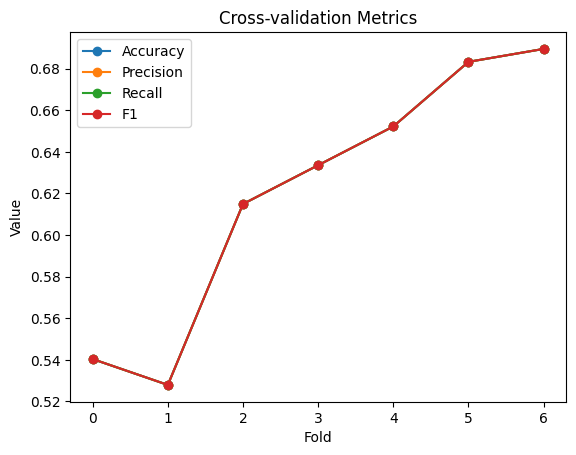

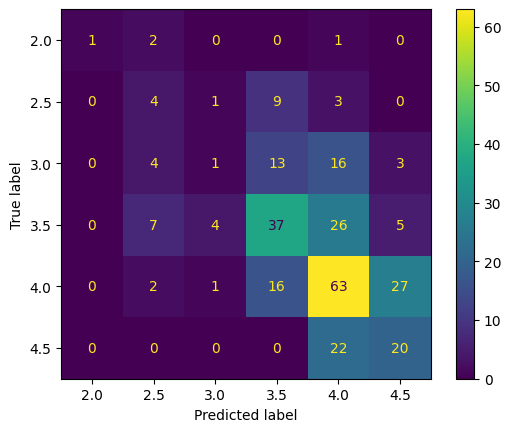

In [ ]:
# SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train_new, y_train_new)
y_predict = svm_rbf.predict(x_test)
perform_cross_validation(model = svm_rbf, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

accuracy:  0.5581188997338065
precision:  0.5581188997338065
recall:  0.5581188997338065
f1:  0.5581188997338065


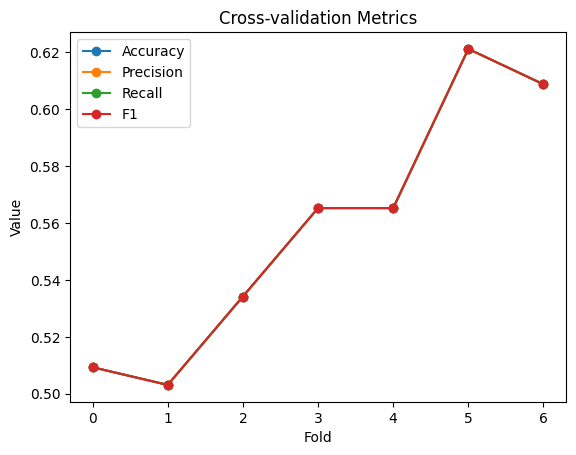

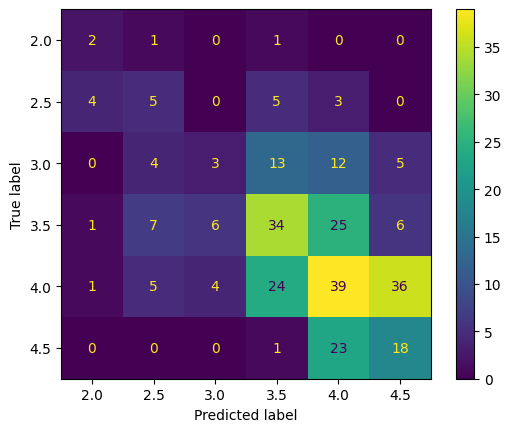

In [ ]:
# SVM
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train_new, y_train_new)
y_predict = svm_sigmoid.predict(x_test)
perform_cross_validation(model = svm_sigmoid, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

accuracy:  0.6291038154392191
precision:  0.6291038154392191
recall:  0.6291038154392191
f1:  0.6291038154392191


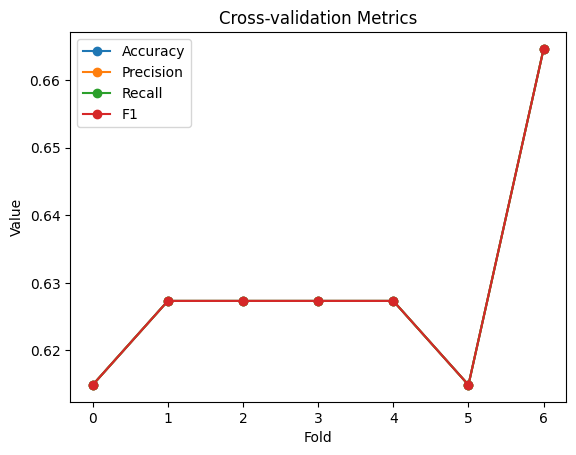

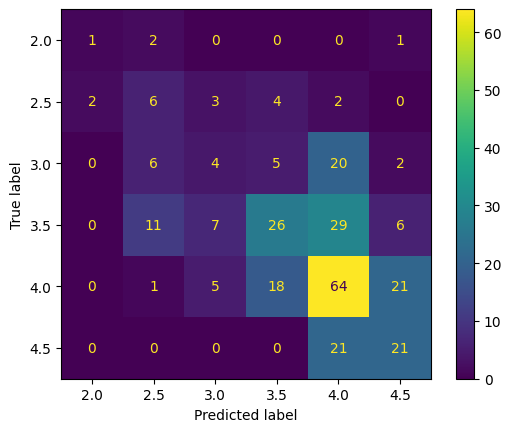

In [ ]:
rf = RandomForestClassifier(class_weight="balanced", random_state=10)
rf.fit(x_train_new, y_train_new)
y_predict = rf.predict(x_test)
perform_cross_validation(model = rf, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

accuracy:  0.665642140363999
precision:  0.665642140363999
recall:  0.665642140363999
f1:  0.665642140363999


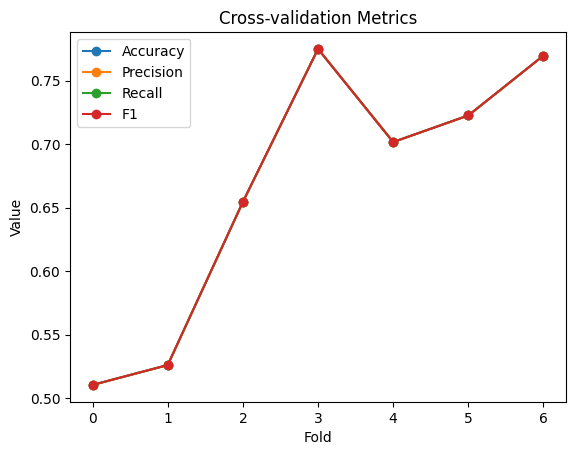

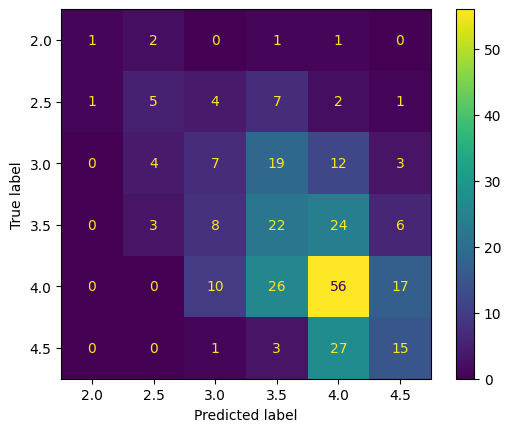

In [ ]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500,250,100,50), alpha=1e-5,random_state=1)
mlp.fit(x_train_new, y_train_new)
y_predict = mlp.predict(x_test)
perform_cross_validation(model = mlp, X=x_train_new, y=y_train_new, n_folds=7, n_iterations=5)
m.ConfusionMatrixDisplay.from_predictions(y_test,y_predict)